# NFL Stats Exploratory Data Analysis

Here I will analyze the data and refine the data to prepare it for analysis.

## Data Cleaning Pt. 2

Before I start EDA, I want to add the finishing touches to my data cleaning process by dropping the first unnecessary column, adding a champion's column for my labels and removing empty rows for teams that did not exist yet.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [99]:
data = pd.read_excel("C:/Users/rolle/OneDrive/Documents/MS Data Science/DTSC 691/NFL_stats_final.xlsx")

In [100]:
data

,Unnamed: 0,.defense.firstDown.value,.defense.firstDownPerG.value,.defense.fumblesLost.value,.defense.fumblesLostPerG.value,.defense.g.value,.defense.passAdjNetYdsPerAtt.value,.defense.passAdjYdsPerAtt.value,.defense.passAtt.value,.defense.passAttPerG.value,.defense.passCmp.value,.defense.passCmpPerG.value,.defense.passCmpPerc.value,.defense.passFd.value,.defense.passFdPerG.value,.defense.passInt.value,.defense.passIntPerG.value,.defense.passIntPerc.value,.defense.passNetYdsPerAtt.value,.defense.passRating.value,.defense.passSacked.value,.defense.passSackedPerG.value,.defense.passSackedPerc.value,.defense.passSackedYds.value,.defense.passSackedYdsPerG.value,.defense.passTd.value,.defense.passTdPerG.value,.defense.passTdPerc.value,.defense.passYds.value,.defense.passYdsPerAtt.value,.defense.passYdsPerCmp.value,.defense.passYdsPerG.value,.defense.penFd.value,.defense.penFdPerG.value,.defense.penalties.value,.defense.penaltiesPerG.value,.defense.penaltiesYds.value,.defense.penaltiesYdsPerG.value,.defense.playsOffense.value,.defense.playsOffensePerG.value,.defense.points.value,.defense.pointsPerG.value,.defense.rushAtt.value,.defense.rushAttPerG.value,.defense.rushFd.value,.defense.rushFdPerG.value,.defense.rushTd.value,.defense.rushTdPerG.value,.defense.rushYds.value,.defense.rushYdsPerAtt.value,.defense.rushYdsPerG.value,.defense.scorePct.value,.defense.team.value,.defense.totalYards.value,.defense.totalYardsPerG.value,.defense.turnoverPct.value,.defense.turnovers.value,.defense.turnoversPerG.value,.defense.ydsPerPlayOffense.value,.differentials.pointDifferential.value,.differentials.turnoverDifferential.value,.games.g.value,.offense.comebacks.value,.offense.firstDown.value,.offense.firstDownPerG.value,.offense.fumbles.value,.offense.fumblesLost.value,.offense.fumblesLostPerG.value,.offense.fumblesPerG.value,.offense.g.value,.offense.gwd.value,.offense.passAdjNetYdsPerAtt.value,.offense.passAdjYdsPerAtt.value,.offense.passAtt.value,.offense.passAttPerG.value,.offense.passCmp.value,.offense.passCmpPerG.value,.offense.passCmpPerc.value,.offense.passFd.value,.offense.passFdPerG.value,.offense.passInt.value,.offense.passIntPerG.value,.offense.passIntPerc.value,.offense.passLong.value,.offense.passNetYdsPerAtt.value,.offense.passRating.value,.offense.passSacked.value,.offense.passSackedPerG.value,.offense.passSackedPerc.value,.offense.passSackedYds.value,.offense.passSackedYdsPerG.value,.offense.passTd.value,.offense.passTdPerG.value,.offense.passTdPerc.value,.offense.passYds.value,.offense.passYdsPerAtt.value,.offense.passYdsPerCmp.value,.offense.passYdsPerG.value,.offense.penFd.value,.offense.penFdPerG.value,.offense.penalties.value,.offense.penaltiesPerG.value,.offense.penaltiesYds.value,.offense.penaltiesYdsPerG.value,.offense.playsOffense.value,.offense.playsOffensePerG.value,.offense.points.value,.offense.pointsPerG.value,.offense.rushAtt.value,.offense.rushAttPerG.value,.offense.rushFd.value,.offense.rushFdPerG.value,.offense.rushLong.value,.offense.rushTd.value,.offense.rushTdPerG.value,.offense.rushYds.value,.offense.rushYdsPerAtt.value,.offense.rushYdsPerG.value,.offense.scorePct.value,.offense.team.value,.offense.totalYards.value,.offense.totalYardsPerG.value,.offense.turnoverPct.value,.offense.turnovers.value,.offense.turnoversPerG.value,.offense.ydsPerPlayOffense.value,.record.record.value,Team_Year,.defense.fourthDownAtt.value,.defense.fourthDownPct.value,.defense.fourthDownSuccess.value,.defense.redZoneAtt.value,.defense.redZonePct.value,.defense.redZoneScores.value,.defense.thirdDownAtt.value,.defense.thirdDownPct.value,.defense.thirdDownSuccess.value,.offense.fourthDownAtt.value,.offense.fourthDownPct.value,.offense.fourthDownSuccess.value,.offense.redZoneAtt.value,.offense.redZonePct.value,.offense.redZoneScores.value,.offense.thirdDownAtt.value,.offense.thirdDownPct.value,.offense.thirdDownSuccess.value,.defense.passDefended.value,.defense.passDefendedPerG.value,.defense.tacklesLoss.value,.defense.tacklesLossPerG.v

## Finish Data Cleaning

In [101]:
#Drop unnecessary first column
data = data.drop(['Unnamed: 0'], axis=1)

In [102]:
#Create Super Bowl Winner Column
#data["Super Bowl Champion"] = 0

data['Super Bowl Champion'] = np.where(((data['Team_Year']== 'Los Angeles Rams 2021') | (data['Team_Year']== 'Tampa Bay Buccaneers 2020') |
                                       (data['Team_Year']== 'Kansas City Chiefs 2019') | (data['Team_Year']== 'New England Patriots 2018') |
                                       (data['Team_Year']== 'Philadelphia Eagles 2017') | (data['Team_Year']== 'New England Patriots 2016') |
                                       (data['Team_Year']== 'Denver Broncos 2015') | (data['Team_Year']== 'New England Patriots 2014') |
                                       (data['Team_Year']== 'Seattle Seahawks 2013') | (data['Team_Year']== 'Baltimore Ravens 2012') |
                                       (data['Team_Year']== 'New York Giants 2011') | (data['Team_Year']== 'Green Bay Packers 2010') |
                                       (data['Team_Year']== 'New Orleans Saints 2009') | (data['Team_Year']== 'Pittsburgh Steelers 2008') |
                                       (data['Team_Year']== 'New York Giants 2007') | (data['Team_Year']== 'Indianapolis Colts 2006') |
                                       (data['Team_Year']== 'Pittsburgh Steelers 2005') | (data['Team_Year']== 'New England Patriots 2004') | 
                                       (data['Team_Year']== 'New England Patriots 2003') | (data['Team_Year']== 'Tampa Bay Buccaneers 2002') | 
                                       (data['Team_Year']== 'New England Patriots 2001') | (data['Team_Year']== 'Baltimore Ravens 2000') | 
                                       (data['Team_Year']== 'Los Angeles Rams 1999') | (data['Team_Year']== 'Denver Broncos 1998') |
                                       (data['Team_Year']== 'Denver Broncos 1997') | (data['Team_Year']== 'Green Bay Packers 1996') | 
                                       (data['Team_Year']== 'Dallas Cowboys 1995') | (data['Team_Year']== 'San Francisco 49ers 1994') | 
                                       (data['Team_Year']== 'Dallas Cowboys 1993') | (data['Team_Year']== 'Dallas Cowboys 1992') | 
                                       (data['Team_Year']== 'Washington Commanders 1991') | (data['Team_Year']== 'New York Giants 1990') | 
                                       (data['Team_Year']== 'San Francisco 49ers 1989') | (data['Team_Year']== 'San Francisco 49ers 1988')  
                                       ), 1, 0)

In [103]:
# Check numbers 
data['Super Bowl Champion'].value_counts()

0    1086
1      34
Name: Super Bowl Champion, dtype: int64

In [104]:
## filter out empty rows
# Each team should have a ['.defense.firstDown.value'] row. If they do not, the team does not exist yet 
#and that row will be dropped

data['.defense.firstDown.value'].isna().value_counts()

False    1079
True       41
Name: .defense.firstDown.value, dtype: int64

In [105]:
# There are NA's for 41 rows as teams did not exist for those spots. These rows will be dropped
data = data[~data['.defense.firstDown.value'].isna()]
data['.defense.firstDown.value'].isna().value_counts()

False    1079
Name: .defense.firstDown.value, dtype: int64

## Exploratory Data Analysis

In [106]:
# Get the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1119
Columns: 158 entries, .defense.firstDown.value to Super Bowl Champion
dtypes: float64(147), int32(1), object(10)
memory usage: 1.3+ MB


In [107]:
#Describe the data
data.describe()

#Here we see that some stats have a lot of NA's as expected as some stats were not recorded until certain periods of time

,.defense.firstDown.value,.defense.firstDownPerG.value,.defense.fumblesLost.value,.defense.fumblesLostPerG.value,.defense.g.value,.defense.passAdjNetYdsPerAtt.value,.defense.passAdjYdsPerAtt.value,.defense.passAtt.value,.defense.passAttPerG.value,.defense.passCmp.value,.defense.passCmpPerG.value,.defense.passCmpPerc.value,.defense.passFd.value,.defense.passFdPerG.value,.defense.passInt.value,.defense.passIntPerG.value,.defense.passIntPerc.value,.defense.passNetYdsPerAtt.value,.defense.passRating.value,.defense.passSacked.value,.defense.passSackedPerG.value,.defense.passSackedPerc.value,.defense.passSackedYds.value,.defense.passSackedYdsPerG.value,.defense.passTd.value,.defense.passTdPerG.value,.defense.passTdPerc.value,.defense.passYds.value,.defense.passYdsPerAtt.value,.defense.passYdsPerCmp.value,.defense.passYdsPerG.value,.defense.penFd.value,.defense.penFdPerG.value,.defense.penalties.value,.defense.penaltiesPerG.value,.defense.penaltiesYds.value,.defense.penaltiesYdsPerG.value,.defense.playsOffense.value,.defense.playsOffensePerG.value,.defense.points.value,.defense.pointsPerG.value,.defense.rushAtt.value,.defense.rushAttPerG.value,.defense.rushFd.value,.defense.rushFdPerG.value,.defense.rushTd.value,.defense.rushTdPerG.value,.defense.rushYds.value,.defense.rushYdsPerAtt.value,.defense.rushYdsPerG.value,.defense.scorePct.value,.defense.totalYards.value,.defense.totalYardsPerG.value,.defense.turnoverPct.value,.defense.turnovers.value,.defense.turnoversPerG.value,.defense.ydsPerPlayOffense.value,.differentials.pointDifferential.value,.differentials.turnoverDifferential.value,.games.g.value,.offense.comebacks.value,.offense.firstDown.value,.offense.firstDownPerG.value,.offense.fumbles.value,.offense.fumblesLost.value,.offense.fumblesLostPerG.value,.offense.fumblesPerG.value,.offense.g.value,.offense.gwd.value,.offense.passAdjNetYdsPerAtt.value,.offense.passAdjYdsPerAtt.value,.offense.passAtt.value,.offense.passAttPerG.value,.offense.passCmp.value,.offense.passCmpPerG.value,.offense.passCmpPerc.value,.offense.passFd.value,.offense.passFdPerG.value,.offense.passInt.value,.offense.passIntPerG.value,.offense.passIntPerc.value,.offense.passLong.value,.offense.passNetYdsPerAtt.value,.offense.passRating.value,.offense.passSacked.value,.offense.passSackedPerG.value,.offense.passSackedPerc.value,.offense.passSackedYds.value,.offense.passSackedYdsPerG.value,.offense.passTd.value,.offense.passTdPerG.value,.offense.passTdPerc.value,.offense.passYds.value,.offense.passYdsPerAtt.value,.offense.passYdsPerCmp.value,.offense.passYdsPerG.value,.offense.penFd.value,.offense.penFdPerG.value,.offense.penalties.value,.offense.penaltiesPerG.value,.offense.penaltiesYds.value,.offense.penaltiesYdsPerG.value,.offense.playsOffense.value,.offense.playsOffensePerG.value,.offense.points.value,.offense.pointsPerG.value,.offense.rushAtt.value,.offense.rushAttPerG.value,.offense.rushFd.value,.offense.rushFdPerG.value,.offense.rushLong.value,.offense.rushTd.value,.offense.rushTdPerG.value,.offense.rushYds.value,.offense.rushYdsPerAtt.value,.offense.rushYdsPerG.value,.offense.scorePct.value,.offense.totalYards.value,.offense.totalYardsPerG.value,.offense.turnoverPct.value,.offense.turnovers.value,.offense.turnoversPerG.value,.offense.ydsPerPlayOffense.value,.defense.fourthDownAtt.value,.defense.fourthDownSuccess.value,.defense.redZoneAtt.value,.defense.redZoneScores.value,.defense.thirdDownAtt.value,.defense.thirdDownSuccess.value,.offense.fourthDownAtt.value,.offense.fourthDownSuccess.value,.offense.redZoneAtt.value,.offense.redZoneScores.value,.offense.thirdDownAtt.value,.offense.thirdDownSuccess.value,.defense.passDefended.value,.defense.passDefendedPerG.value,.defense.tacklesLoss.value,.defense.tacklesLossPerG.value,.defense.expPtsDefTot.value,.defense.expPtsPassDef.value,.defense.expPtsRushDef.value,.offense.expPtsPass.value,.offense.expPtsRush.value,.offense.expPtsTot.value,.defense.qbHits.value,.defense.qbHitsPerG.value,Super Bowl Champion
count,1079.0

In [108]:
# Get a list and DataFrame of columns with nas
NaN_Cols = data.columns[data.isna().any()].tolist()
data_NaN = data[NaN_Cols] 
data_NaN

,.defense.penaltiesPerG.value,.defense.playsOffense.value,.differentials.pointDifferential.value,.games.g.value,.offense.passTd.value,.offense.penaltiesYds.value,.offense.scorePct.value,.record.record.value,.defense.fourthDownAtt.value,.defense.fourthDownPct.value,.defense.fourthDownSuccess.value,.defense.redZoneAtt.value,.defense.redZonePct.value,.defense.redZoneScores.value,.defense.thirdDownAtt.value,.defense.thirdDownPct.value,.defense.thirdDownSuccess.value,.offense.fourthDownAtt.value,.offense.fourthDownPct.value,.offense.fourthDownSuccess.value,.offense.redZoneAtt.value,.offense.redZonePct.value,.offense.redZoneScores.value,.offense.thirdDownAtt.value,.offense.thirdDownPct.value,.offense.thirdDownSuccess.value,.defense.passDefended.value,.defense.passDefendedPerG.value,.defense.tacklesLoss.value,.defense.tacklesLossPerG.value,.defense.expPtsDefTot.value,.defense.expPtsPassDef.value,.defense.expPtsRushDef.value,.offense.expPtsPass.value,.offense.expPtsRush.value,.offense.expPtsTot.value,.defense.qbHits.value,.defense.qbHitsPerG.value
0,6.44,1014.0,-54.0,16.0,26.0,790.0,0.0,7 - 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.75,1052.0,-71.0,16.0,13.0,542.0,0.0,5 - 11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.63,971.0,92.0,16.0,15.0,824.0,0.0,12 - 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.38,977.0,97.0,16.0,13.0,644.0,0.0,12 - 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5.94,1059.0,119.0,16.0,28.0,647.0,0.0,12 - 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,5.13,481.0,29.0,8.0,12.0,358.0,34.5,4 - 4,7.0,71.4%,5.0,20.0,65.0%,13.0,106.0,41.5%,44.0,7.0,28.6%,2.0,26.0,57.7%,15.0,97.0,44.3%,43.0,31.0,3.88,42.0,5.25,1.37,-3.03,2.30,55.75,-9.84,42.19,54.0,6.75
1116,6.00,532.0,11.0,8.0,13.0,528.0,44.7,5 - 3,16.0,43.8%,7.0,27.0,59.3%,16.0,108.0,41.7%,45.0,8.0,50.0%,4.0,25.0,40.0%,10.0,92.0,42.4%,39.0,35.0,4.38,39.0,4.88,-54.93,-59.61,0.04,52.36,5.06,48.63,49.0,6.13
1117,6.75,514.0,-5.0,8.0,9.0,358.0,35.6,3 - 5,10.0,40.0%,4.0,23.0,69.6%,16.0,114.0,42.1%,48.0,9.0,55.6%,5.0,24.0,45.8%,11.0,107.0,34.6%,37.0,26.0,3.25,46.0,5.75,-0.37,3.32,-7.91,54.45,-35.63,13.20,47.0,5.88
1118,6.86,424.0,-6.0,7.0,6.0,381.0,30.7,5 - 2,12.0,83.3%,10.0,21.0,52.4%,11.0,86.0,25.6%,22.0,4.0,75.0%,3.0,17.0,76.5%,13.0,83.0,36.1%,30.0,28.0,4.00,31.0,4.43,-7.88,-26.49,7.06,4.50,1.50,0.46,44.0,6.29


In [109]:
# Check to see how many NA's are in each row. If it is a large amount NA's due to the stat not existing yet (84 and 314 NaNs)
# then I will drop them. Otherwise, I will look into how I can impute a value to fix the NA values.
data_NaN.isna().sum()

.defense.penaltiesPerG.value                1
.defense.playsOffense.value                 1
.differentials.pointDifferential.value      2
.games.g.value                              7
.offense.passTd.value                       1
.offense.penaltiesYds.value                 1
.offense.scorePct.value                     1
.record.record.value                        2
.defense.fourthDownAtt.value               85
.defense.fourthDownPct.value               84
.defense.fourthDownSuccess.value           84
.defense.redZoneAtt.value                  84
.defense.redZonePct.value                  84
.defense.redZoneScores.value               84
.defense.thirdDownAtt.value                84
.defense.thirdDownPct.value                84
.defense.thirdDownSuccess.value            84
.offense.fourthDownAtt.value               84
.offense.fourthDownPct.value               84
.offense.fourthDownSuccess.value           84
.offense.redZoneAtt.value                  84
.offense.redZonePct.value         

## .defense.penaltiesPerG.value

### 1 NaN

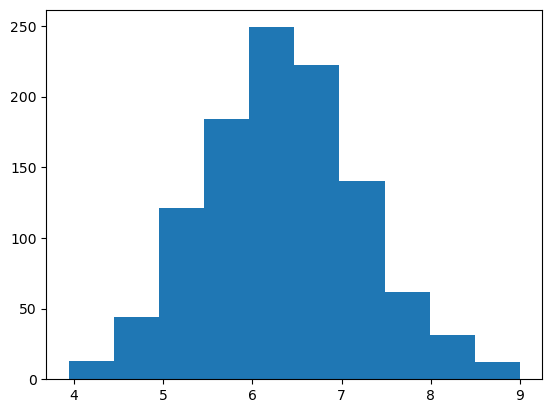

In [110]:
#.defense.penaltiesPerG.value
plt.hist(data_NaN[".defense.penaltiesPerG.value"])
plt.show()

In [111]:
NaN_penG =  data[data[".defense.penaltiesPerG.value"].isna()]
NaN_penG

# This seems to be an input error by the api maintainers. To remedy this, I will simply input the previous year's value

,.defense.firstDown.value,.defense.firstDownPerG.value,.defense.fumblesLost.value,.defense.fumblesLostPerG.value,.defense.g.value,.defense.passAdjNetYdsPerAtt.value,.defense.passAdjYdsPerAtt.value,.defense.passAtt.value,.defense.passAttPerG.value,.defense.passCmp.value,.defense.passCmpPerG.value,.defense.passCmpPerc.value,.defense.passFd.value,.defense.passFdPerG.value,.defense.passInt.value,.defense.passIntPerG.value,.defense.passIntPerc.value,.defense.passNetYdsPerAtt.value,.defense.passRating.value,.defense.passSacked.value,.defense.passSackedPerG.value,.defense.passSackedPerc.value,.defense.passSackedYds.value,.defense.passSackedYdsPerG.value,.defense.passTd.value,.defense.passTdPerG.value,.defense.passTdPerc.value,.defense.passYds.value,.defense.passYdsPerAtt.value,.defense.passYdsPerCmp.value,.defense.passYdsPerG.value,.defense.penFd.value,.defense.penFdPerG.value,.defense.penalties.value,.defense.penaltiesPerG.value,.defense.penaltiesYds.value,.defense.penaltiesYdsPerG.value,.defense.playsOffense.value,.defense.playsOffensePerG.value,.defense.points.value,.defense.pointsPerG.value,.defense.rushAtt.value,.defense.rushAttPerG.value,.defense.rushFd.value,.defense.rushFdPerG.value,.defense.rushTd.value,.defense.rushTdPerG.value,.defense.rushYds.value,.defense.rushYdsPerAtt.value,.defense.rushYdsPerG.value,.defense.scorePct.value,.defense.team.value,.defense.totalYards.value,.defense.totalYardsPerG.value,.defense.turnoverPct.value,.defense.turnovers.value,.defense.turnoversPerG.value,.defense.ydsPerPlayOffense.value,.differentials.pointDifferential.value,.differentials.turnoverDifferential.value,.games.g.value,.offense.comebacks.value,.offense.firstDown.value,.offense.firstDownPerG.value,.offense.fumbles.value,.offense.fumblesLost.value,.offense.fumblesLostPerG.value,.offense.fumblesPerG.value,.offense.g.value,.offense.gwd.value,.offense.passAdjNetYdsPerAtt.value,.offense.passAdjYdsPerAtt.value,.offense.passAtt.value,.offense.passAttPerG.value,.offense.passCmp.value,.offense.passCmpPerG.value,.offense.passCmpPerc.value,.offense.passFd.value,.offense.passFdPerG.value,.offense.passInt.value,.offense.passIntPerG.value,.offense.passIntPerc.value,.offense.passLong.value,.offense.passNetYdsPerAtt.value,.offense.passRating.value,.offense.passSacked.value,.offense.passSackedPerG.value,.offense.passSackedPerc.value,.offense.passSackedYds.value,.offense.passSackedYdsPerG.value,.offense.passTd.value,.offense.passTdPerG.value,.offense.passTdPerc.value,.offense.passYds.value,.offense.passYdsPerAtt.value,.offense.passYdsPerCmp.value,.offense.passYdsPerG.value,.offense.penFd.value,.offense.penFdPerG.value,.offense.penalties.value,.offense.penaltiesPerG.value,.offense.penaltiesYds.value,.offense.penaltiesYdsPerG.value,.offense.playsOffense.value,.offense.playsOffensePerG.value,.offense.points.value,.offense.pointsPerG.value,.offense.rushAtt.value,.offense.rushAttPerG.value,.offense.rushFd.value,.offense.rushFdPerG.value,.offense.rushLong.value,.offense.rushTd.value,.offense.rushTdPerG.value,.offense.rushYds.value,.offense.rushYdsPerAtt.value,.offense.rushYdsPerG.value,.offense.scorePct.value,.offense.team.value,.offense.totalYards.value,.offense.totalYardsPerG.value,.offense.turnoverPct.value,.offense.turnovers.value,.offense.turnoversPerG.value,.offense.ydsPerPlayOffense.value,.record.record.value,Team_Year,.defense.fourthDownAtt.value,.defense.fourthDownPct.value,.defense.fourthDownSuccess.value,.defense.redZoneAtt.value,.defense.redZonePct.value,.defense.redZoneScores.value,.defense.thirdDownAtt.value,.defense.thirdDownPct.value,.defense.thirdDownSuccess.value,.offense.fourthDownAtt.value,.offense.fourthDownPct.value,.offense.fourthDownSuccess.value,.offense.redZoneAtt.value,.offense.redZonePct.value,.offense.redZoneScores.value,.offense.thirdDownAtt.value,.offense.thirdDownPct.value,.offense.thirdDownSuccess.value,.defense.passDefended.value,.defense.passDefendedPerG.value,.defense.tacklesLoss.value,.defense.tacklesLossPerG.value,.defen

In [112]:
## Update the value and check results
data.at[124,'.defense.penaltiesPerG.value']=6.75

## .defense.playsOffense.value

### 1 NaN

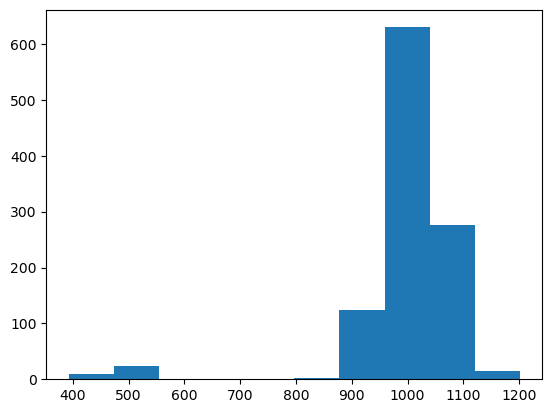

In [113]:
plt.hist(data['.defense.playsOffense.value'])
plt.show() 

In [114]:
NaN_poff =  data[data[".defense.playsOffense.value"].isna()]
NaN_poff

# This seems to be an input error by the api maintainers. To remedy this, I will simply input the previous year's value

,.defense.firstDown.value,.defense.firstDownPerG.value,.defense.fumblesLost.value,.defense.fumblesLostPerG.value,.defense.g.value,.defense.passAdjNetYdsPerAtt.value,.defense.passAdjYdsPerAtt.value,.defense.passAtt.value,.defense.passAttPerG.value,.defense.passCmp.value,.defense.passCmpPerG.value,.defense.passCmpPerc.value,.defense.passFd.value,.defense.passFdPerG.value,.defense.passInt.value,.defense.passIntPerG.value,.defense.passIntPerc.value,.defense.passNetYdsPerAtt.value,.defense.passRating.value,.defense.passSacked.value,.defense.passSackedPerG.value,.defense.passSackedPerc.value,.defense.passSackedYds.value,.defense.passSackedYdsPerG.value,.defense.passTd.value,.defense.passTdPerG.value,.defense.passTdPerc.value,.defense.passYds.value,.defense.passYdsPerAtt.value,.defense.passYdsPerCmp.value,.defense.passYdsPerG.value,.defense.penFd.value,.defense.penFdPerG.value,.defense.penalties.value,.defense.penaltiesPerG.value,.defense.penaltiesYds.value,.defense.penaltiesYdsPerG.value,.defense.playsOffense.value,.defense.playsOffensePerG.value,.defense.points.value,.defense.pointsPerG.value,.defense.rushAtt.value,.defense.rushAttPerG.value,.defense.rushFd.value,.defense.rushFdPerG.value,.defense.rushTd.value,.defense.rushTdPerG.value,.defense.rushYds.value,.defense.rushYdsPerAtt.value,.defense.rushYdsPerG.value,.defense.scorePct.value,.defense.team.value,.defense.totalYards.value,.defense.totalYardsPerG.value,.defense.turnoverPct.value,.defense.turnovers.value,.defense.turnoversPerG.value,.defense.ydsPerPlayOffense.value,.differentials.pointDifferential.value,.differentials.turnoverDifferential.value,.games.g.value,.offense.comebacks.value,.offense.firstDown.value,.offense.firstDownPerG.value,.offense.fumbles.value,.offense.fumblesLost.value,.offense.fumblesLostPerG.value,.offense.fumblesPerG.value,.offense.g.value,.offense.gwd.value,.offense.passAdjNetYdsPerAtt.value,.offense.passAdjYdsPerAtt.value,.offense.passAtt.value,.offense.passAttPerG.value,.offense.passCmp.value,.offense.passCmpPerG.value,.offense.passCmpPerc.value,.offense.passFd.value,.offense.passFdPerG.value,.offense.passInt.value,.offense.passIntPerG.value,.offense.passIntPerc.value,.offense.passLong.value,.offense.passNetYdsPerAtt.value,.offense.passRating.value,.offense.passSacked.value,.offense.passSackedPerG.value,.offense.passSackedPerc.value,.offense.passSackedYds.value,.offense.passSackedYdsPerG.value,.offense.passTd.value,.offense.passTdPerG.value,.offense.passTdPerc.value,.offense.passYds.value,.offense.passYdsPerAtt.value,.offense.passYdsPerCmp.value,.offense.passYdsPerG.value,.offense.penFd.value,.offense.penFdPerG.value,.offense.penalties.value,.offense.penaltiesPerG.value,.offense.penaltiesYds.value,.offense.penaltiesYdsPerG.value,.offense.playsOffense.value,.offense.playsOffensePerG.value,.offense.points.value,.offense.pointsPerG.value,.offense.rushAtt.value,.offense.rushAttPerG.value,.offense.rushFd.value,.offense.rushFdPerG.value,.offense.rushLong.value,.offense.rushTd.value,.offense.rushTdPerG.value,.offense.rushYds.value,.offense.rushYdsPerAtt.value,.offense.rushYdsPerG.value,.offense.scorePct.value,.offense.team.value,.offense.totalYards.value,.offense.totalYardsPerG.value,.offense.turnoverPct.value,.offense.turnovers.value,.offense.turnoversPerG.value,.offense.ydsPerPlayOffense.value,.record.record.value,Team_Year,.defense.fourthDownAtt.value,.defense.fourthDownPct.value,.defense.fourthDownSuccess.value,.defense.redZoneAtt.value,.defense.redZonePct.value,.defense.redZoneScores.value,.defense.thirdDownAtt.value,.defense.thirdDownPct.value,.defense.thirdDownSuccess.value,.offense.fourthDownAtt.value,.offense.fourthDownPct.value,.offense.fourthDownSuccess.value,.offense.redZoneAtt.value,.offense.redZonePct.value,.offense.redZoneScores.value,.offense.thirdDownAtt.value,.offense.thirdDownPct.value,.offense.thirdDownSuccess.value,.defense.passDefended.value,.defense.passDefendedPerG.value,.defense.tacklesLoss.value,.defense.tacklesLossPerG.value,.defen

In [115]:
## Update the value and check results
data.at[423,'.defense.playsOffense.value']=960

## .differentials.pointDifferential.value

### 1 NaN

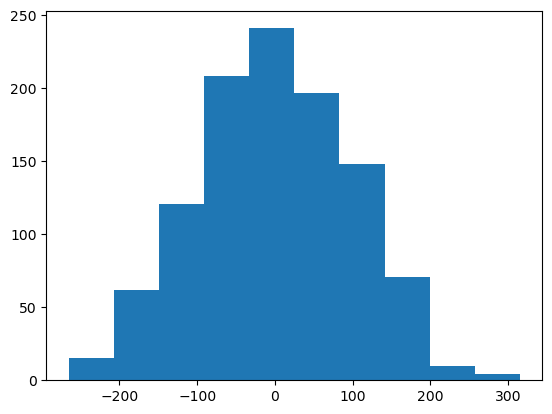

In [116]:
plt.hist(data['.differentials.pointDifferential.value'])
plt.show()

In [117]:
NaN_pdiff =  data[data[".differentials.pointDifferential.value"].isna()]
NaN_pdiff

# This seems to be an input error by the api maintainers. To remedy this, I will simply input the previous year's value

,.defense.firstDown.value,.defense.firstDownPerG.value,.defense.fumblesLost.value,.defense.fumblesLostPerG.value,.defense.g.value,.defense.passAdjNetYdsPerAtt.value,.defense.passAdjYdsPerAtt.value,.defense.passAtt.value,.defense.passAttPerG.value,.defense.passCmp.value,.defense.passCmpPerG.value,.defense.passCmpPerc.value,.defense.passFd.value,.defense.passFdPerG.value,.defense.passInt.value,.defense.passIntPerG.value,.defense.passIntPerc.value,.defense.passNetYdsPerAtt.value,.defense.passRating.value,.defense.passSacked.value,.defense.passSackedPerG.value,.defense.passSackedPerc.value,.defense.passSackedYds.value,.defense.passSackedYdsPerG.value,.defense.passTd.value,.defense.passTdPerG.value,.defense.passTdPerc.value,.defense.passYds.value,.defense.passYdsPerAtt.value,.defense.passYdsPerCmp.value,.defense.passYdsPerG.value,.defense.penFd.value,.defense.penFdPerG.value,.defense.penalties.value,.defense.penaltiesPerG.value,.defense.penaltiesYds.value,.defense.penaltiesYdsPerG.value,.defense.playsOffense.value,.defense.playsOffensePerG.value,.defense.points.value,.defense.pointsPerG.value,.defense.rushAtt.value,.defense.rushAttPerG.value,.defense.rushFd.value,.defense.rushFdPerG.value,.defense.rushTd.value,.defense.rushTdPerG.value,.defense.rushYds.value,.defense.rushYdsPerAtt.value,.defense.rushYdsPerG.value,.defense.scorePct.value,.defense.team.value,.defense.totalYards.value,.defense.totalYardsPerG.value,.defense.turnoverPct.value,.defense.turnovers.value,.defense.turnoversPerG.value,.defense.ydsPerPlayOffense.value,.differentials.pointDifferential.value,.differentials.turnoverDifferential.value,.games.g.value,.offense.comebacks.value,.offense.firstDown.value,.offense.firstDownPerG.value,.offense.fumbles.value,.offense.fumblesLost.value,.offense.fumblesLostPerG.value,.offense.fumblesPerG.value,.offense.g.value,.offense.gwd.value,.offense.passAdjNetYdsPerAtt.value,.offense.passAdjYdsPerAtt.value,.offense.passAtt.value,.offense.passAttPerG.value,.offense.passCmp.value,.offense.passCmpPerG.value,.offense.passCmpPerc.value,.offense.passFd.value,.offense.passFdPerG.value,.offense.passInt.value,.offense.passIntPerG.value,.offense.passIntPerc.value,.offense.passLong.value,.offense.passNetYdsPerAtt.value,.offense.passRating.value,.offense.passSacked.value,.offense.passSackedPerG.value,.offense.passSackedPerc.value,.offense.passSackedYds.value,.offense.passSackedYdsPerG.value,.offense.passTd.value,.offense.passTdPerG.value,.offense.passTdPerc.value,.offense.passYds.value,.offense.passYdsPerAtt.value,.offense.passYdsPerCmp.value,.offense.passYdsPerG.value,.offense.penFd.value,.offense.penFdPerG.value,.offense.penalties.value,.offense.penaltiesPerG.value,.offense.penaltiesYds.value,.offense.penaltiesYdsPerG.value,.offense.playsOffense.value,.offense.playsOffensePerG.value,.offense.points.value,.offense.pointsPerG.value,.offense.rushAtt.value,.offense.rushAttPerG.value,.offense.rushFd.value,.offense.rushFdPerG.value,.offense.rushLong.value,.offense.rushTd.value,.offense.rushTdPerG.value,.offense.rushYds.value,.offense.rushYdsPerAtt.value,.offense.rushYdsPerG.value,.offense.scorePct.value,.offense.team.value,.offense.totalYards.value,.offense.totalYardsPerG.value,.offense.turnoverPct.value,.offense.turnovers.value,.offense.turnoversPerG.value,.offense.ydsPerPlayOffense.value,.record.record.value,Team_Year,.defense.fourthDownAtt.value,.defense.fourthDownPct.value,.defense.fourthDownSuccess.value,.defense.redZoneAtt.value,.defense.redZonePct.value,.defense.redZoneScores.value,.defense.thirdDownAtt.value,.defense.thirdDownPct.value,.defense.thirdDownSuccess.value,.offense.fourthDownAtt.value,.offense.fourthDownPct.value,.offense.fourthDownSuccess.value,.offense.redZoneAtt.value,.offense.redZonePct.value,.offense.redZoneScores.value,.offense.thirdDownAtt.value,.offense.thirdDownPct.value,.offense.thirdDownSuccess.value,.defense.passDefended.value,.defense.passDefendedPerG.value,.defense.tacklesLoss.value,.defense.tacklesLossPerG.value,.defen

In [118]:
## Update the value and check results

## Las Vegas Raiders 2013
data.at[816,'.differentials.pointDifferential.value']=-153
## Atlanta Falcons 2015
data.at[865,'.differentials.pointDifferential.value']=-36

## .games.g.value

### 7 NaN

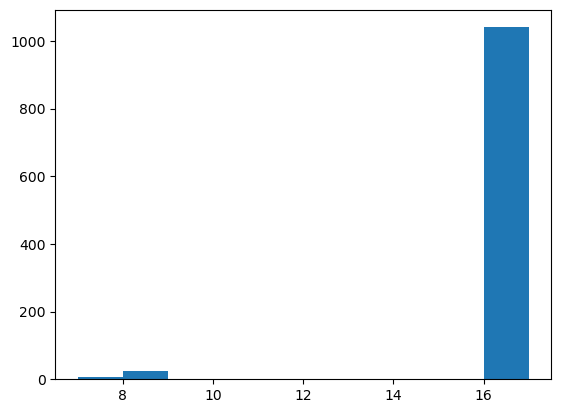

In [119]:
plt.hist(data['.games.g.value'])
plt.show()

In [120]:
NaN_game =  data[data[".games.g.value"].isna()]
NaN_game

# This seems to be an input error by the api maintainers. To remedy this, I will simply input the correct game value for
# that year since every team has the same amount of games each year.

,.defense.firstDown.value,.defense.firstDownPerG.value,.defense.fumblesLost.value,.defense.fumblesLostPerG.value,.defense.g.value,.defense.passAdjNetYdsPerAtt.value,.defense.passAdjYdsPerAtt.value,.defense.passAtt.value,.defense.passAttPerG.value,.defense.passCmp.value,.defense.passCmpPerG.value,.defense.passCmpPerc.value,.defense.passFd.value,.defense.passFdPerG.value,.defense.passInt.value,.defense.passIntPerG.value,.defense.passIntPerc.value,.defense.passNetYdsPerAtt.value,.defense.passRating.value,.defense.passSacked.value,.defense.passSackedPerG.value,.defense.passSackedPerc.value,.defense.passSackedYds.value,.defense.passSackedYdsPerG.value,.defense.passTd.value,.defense.passTdPerG.value,.defense.passTdPerc.value,.defense.passYds.value,.defense.passYdsPerAtt.value,.defense.passYdsPerCmp.value,.defense.passYdsPerG.value,.defense.penFd.value,.defense.penFdPerG.value,.defense.penalties.value,.defense.penaltiesPerG.value,.defense.penaltiesYds.value,.defense.penaltiesYdsPerG.value,.defense.playsOffense.value,.defense.playsOffensePerG.value,.defense.points.value,.defense.pointsPerG.value,.defense.rushAtt.value,.defense.rushAttPerG.value,.defense.rushFd.value,.defense.rushFdPerG.value,.defense.rushTd.value,.defense.rushTdPerG.value,.defense.rushYds.value,.defense.rushYdsPerAtt.value,.defense.rushYdsPerG.value,.defense.scorePct.value,.defense.team.value,.defense.totalYards.value,.defense.totalYardsPerG.value,.defense.turnoverPct.value,.defense.turnovers.value,.defense.turnoversPerG.value,.defense.ydsPerPlayOffense.value,.differentials.pointDifferential.value,.differentials.turnoverDifferential.value,.games.g.value,.offense.comebacks.value,.offense.firstDown.value,.offense.firstDownPerG.value,.offense.fumbles.value,.offense.fumblesLost.value,.offense.fumblesLostPerG.value,.offense.fumblesPerG.value,.offense.g.value,.offense.gwd.value,.offense.passAdjNetYdsPerAtt.value,.offense.passAdjYdsPerAtt.value,.offense.passAtt.value,.offense.passAttPerG.value,.offense.passCmp.value,.offense.passCmpPerG.value,.offense.passCmpPerc.value,.offense.passFd.value,.offense.passFdPerG.value,.offense.passInt.value,.offense.passIntPerG.value,.offense.passIntPerc.value,.offense.passLong.value,.offense.passNetYdsPerAtt.value,.offense.passRating.value,.offense.passSacked.value,.offense.passSackedPerG.value,.offense.passSackedPerc.value,.offense.passSackedYds.value,.offense.passSackedYdsPerG.value,.offense.passTd.value,.offense.passTdPerG.value,.offense.passTdPerc.value,.offense.passYds.value,.offense.passYdsPerAtt.value,.offense.passYdsPerCmp.value,.offense.passYdsPerG.value,.offense.penFd.value,.offense.penFdPerG.value,.offense.penalties.value,.offense.penaltiesPerG.value,.offense.penaltiesYds.value,.offense.penaltiesYdsPerG.value,.offense.playsOffense.value,.offense.playsOffensePerG.value,.offense.points.value,.offense.pointsPerG.value,.offense.rushAtt.value,.offense.rushAttPerG.value,.offense.rushFd.value,.offense.rushFdPerG.value,.offense.rushLong.value,.offense.rushTd.value,.offense.rushTdPerG.value,.offense.rushYds.value,.offense.rushYdsPerAtt.value,.offense.rushYdsPerG.value,.offense.scorePct.value,.offense.team.value,.offense.totalYards.value,.offense.totalYardsPerG.value,.offense.turnoverPct.value,.offense.turnovers.value,.offense.turnoversPerG.value,.offense.ydsPerPlayOffense.value,.record.record.value,Team_Year,.defense.fourthDownAtt.value,.defense.fourthDownPct.value,.defense.fourthDownSuccess.value,.defense.redZoneAtt.value,.defense.redZonePct.value,.defense.redZoneScores.value,.defense.thirdDownAtt.value,.defense.thirdDownPct.value,.defense.thirdDownSuccess.value,.offense.fourthDownAtt.value,.offense.fourthDownPct.value,.offense.fourthDownSuccess.value,.offense.redZoneAtt.value,.offense.redZonePct.value,.offense.redZoneScores.value,.offense.thirdDownAtt.value,.offense.thirdDownPct.value,.offense.thirdDownSuccess.value,.defense.passDefended.value,.defense.passDefendedPerG.value,.defense.tacklesLoss.value,.defense.tacklesLossPerG.value,.defen

In [121]:
## Update the value and check results

## Detroit Lions 1992
data.at[138,'.games.g.value']=16
## New York Giants 1995
data.at[247,'.games.g.value']=16
## Green Bay Packers 1999
data.at[363,'.games.g.value']=16
## Los Angeles Chargers 2000
data.at[402,'.games.g.value']=16
## Kansas City Chiefs 2006
data.at[591,'.games.g.value']=16
## Las Vegas Raiders 2020
data.at[1040,'.games.g.value']=16
## Miami Dolphins 2021
data.at[1075,'.games.g.value']=17